In [1]:
# notebook configuration
%matplotlib inline

import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from IPython.display import Image
#import pandas as pd


# define general parameters for plots
plt.rcParams["figure.figsize"] = (12.0, 9.0)


In [2]:
def Reynolds(rho, vr, dp, mu):
    Re = rho*vr*dp/mu
    
    return Re

def Prandlt(cp, mu, k):
    Pr = cp*mu/k
    
    return Pr

def Grashof(L, rho, mu, Tw, Tinf):
    Tfilm = (Tw+Tinf)/2
    beta = 1/Tfilm
    Gr = (L*L*L*9.81*beta*(Tw-Tinf)*rho*rho)/(mu*mu)
        
    return Gr

def Rayleight(Gr, Pr):
    Ra = Gr*Pr
        
    return Ra

def NusseltGunn(Re, Pr, alpha_f):

    Nu = (7.0 - 10.0 * alpha_f + 5.0 * alpha_f * alpha_f) * (1.0 + 0.7 * np.power(Re, 0.2) * np.power(Pr, 0.3333333333)) + \
    (1.33 - 2.4 * alpha_f + 1.2 * alpha_f * alpha_f) * np.power(Re, 0.7) * np.power(Pr, 0.3333333333)

    return Nu

def h_average(Nu, dp, k):
    h = Nu*k/dp
    
    return h

def Biot(dp, h, ks):
    Bi = dp*h/ks
    
    return Bi

In [50]:
# loading the digitized data

case1 = open("standard_k0,25_cp800.csv", 'r')
time_case1_shs, temp_case1_shs, temp_case1_shs_max, temp_case1_shs_min = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("improved_k0,25_cp800.csv", 'r')
time_case1_ihs, temp_case1_ihs, temp_case1_ihs_max, temp_case1_ihs_min = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()


case1 = open("NETL-case1-standard-k0,25-cp800-particle-data-5.0", 'r')
particle_temp_case1s_5s = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("NETL-case1-standard-k0,25-cp800-particle-data-10.0", 'r')
particle_temp_case1s_10s = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("NETL-case1-improved-k0,25-cp800-particle-data-5.0", 'r')
particle_temp_case1i_5s = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

case1 = open("NETL-case1-improved-k0,25-cp800_particle-data-10.0", 'r')
particle_temp_case1i_10s = np.loadtxt(case1, delimiter = ',', skiprows = 1, unpack = True)    
case1.close()

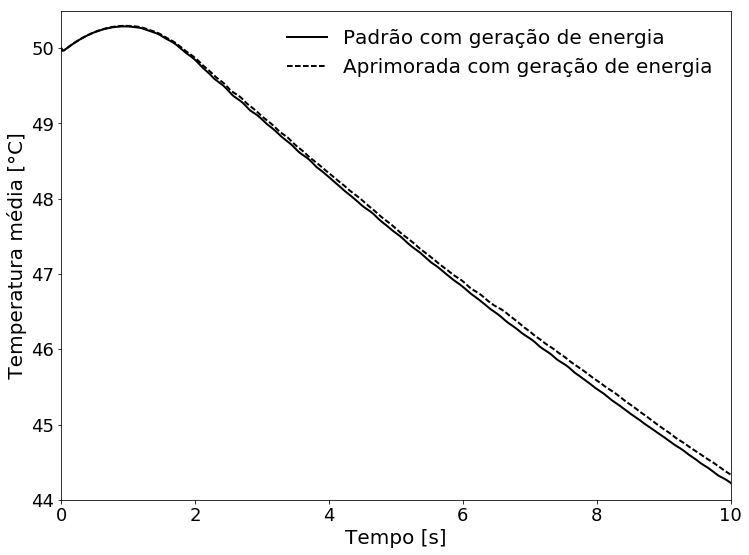

In [56]:

#plt.plot(time_case1,  temp_case1-273.15, linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Standard")
plt.plot(time_case1_shs,  temp_case1_shs-273.15, linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Padrão com geração de energia")

plt.plot(time_case1_ihs,  temp_case1_ihs-273.15, linestyle = "--", color = "black", marker = 'None', linewidth = 2,label = "Aprimorada com geração de energia")

#plt.title("Vertical velocity ", fontsize = 16)
plt.xlabel("Tempo [s]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Temperatura média [\u00B0C] ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.xlim(0, 10)     
plt.ylim(44, 50.5) 
plt.savefig("average_bed_temperature_geracao_energia.png")
plt.show()

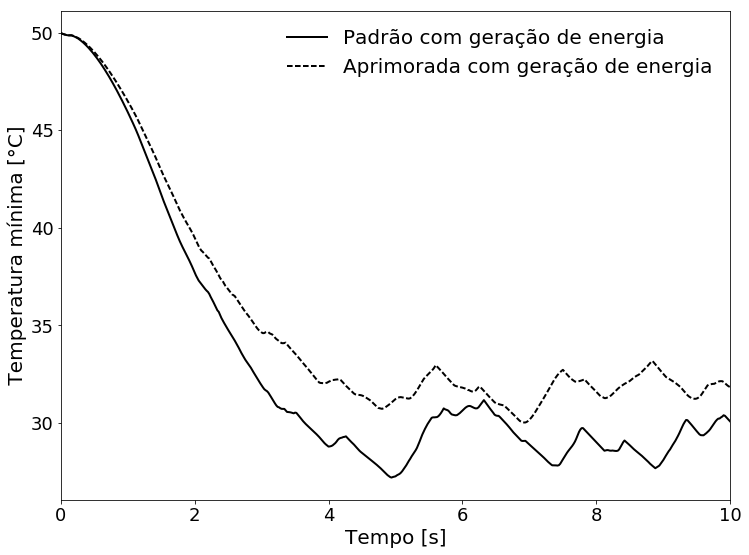

In [31]:
plt.plot(time_case1_shs,  temp_case1_shs_min-273.15,  linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Padrão com geração de energia")
plt.plot(time_case1_ihs,  temp_case1_ihs_min-273.15,  linestyle = "--", color = "black", marker = 'None', linewidth = 2,label = "Aprimorada com geração de energia")

#plt.title("Vertical velocity ", fontsize = 16)
plt.xlabel("Tempo [s]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Temperatura mínima [\u00B0C] ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.xlim(0, 10)     
#plt.ylim(300, 323.15) 
#plt.savefig("min_bed_temperature.png")
plt.show()

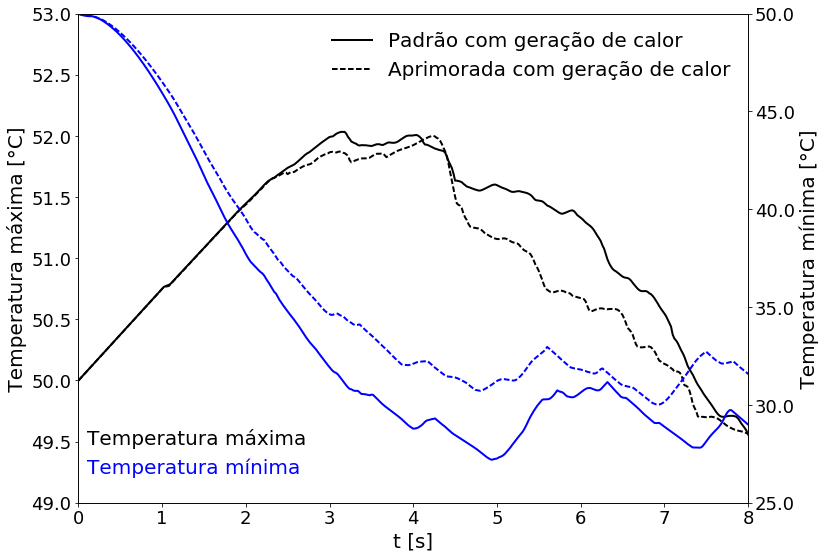

In [57]:
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots()
ax1.plot(time_case1_shs,  temp_case1_shs_max-273.15, linestyle = "-", color = "black", marker = 'None', linewidth = 2,label = "Padrão com geração de calor")
ax1.plot(time_case1_ihs,  temp_case1_ihs_max-273.15, linestyle = "--", color = "black", marker = 'None', linewidth = 2,label = "Aprimorada com geração de calor")
ax1.set_xlabel("t [s]", fontsize = 20)
ax1.set_ylabel(" Temperatura máxima [\u00B0C] ", fontsize = 20)
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
plt.ylim(49, 53) 
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 1)

ax2 = ax1.twinx()
ax2.plot(time_case1_shs,  temp_case1_shs_min-273.15, linestyle = "-", color = "blue", marker = 'None', linewidth = 2)
ax2.plot(time_case1_ihs,  temp_case1_ihs_min-273.15, linestyle = "--", color = "blue", marker = 'None', linewidth = 2)
ax2.set_ylabel(" Temperatura mínima [\u00B0C] ", fontsize = 20)
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x}"))
#ax2.tick_params('y')
plt.ylim(25, 50) 
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)


plt.xlim(0, 8)     

#fig.tight_layout()
plt.savefig("bed_temperature_com_geracao_energia.png")
plt.annotate('Temperatura máxima', color = "black",xy=(0.1, 28), fontsize=20)
plt.annotate('Temperatura mínima', color = "blue", xy=(.1, 26.5), fontsize=20)
plt.show()


314.905
313.086


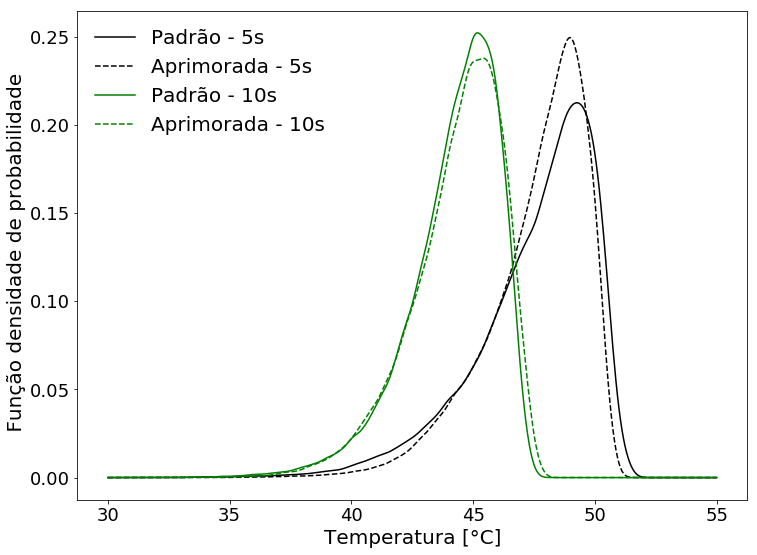

In [53]:
print(particle_temp_case1s_5s[0])
print(particle_temp_case1i_5s[0])

from scipy.stats import gaussian_kde
xs = np.linspace(30,55,400)
densityStandard_5s_s = gaussian_kde(particle_temp_case1s_5s-273.15)
densityStandard_10s_s = gaussian_kde(particle_temp_case1s_10s-273.15)


densityStandard_5s_i = gaussian_kde(particle_temp_case1i_5s-273.15)
densityStandard_10s_i = gaussian_kde(particle_temp_case1i_10s-273.15)
#densityStandard_5s_john.covariance_factor = lambda : .25
#densityStandard_5s_john._compute_covariance()


plt.plot(xs,densityStandard_5s_s(xs),  linestyle = "-", color = "black", label = "Padrão - 5s")
plt.plot(xs,densityStandard_5s_i(xs),  linestyle = "--", color = "black", label = "Aprimorada - 5s")
plt.plot(xs,densityStandard_10s_s(xs),  linestyle = "-", color = "green", label = "Padrão - 10s")
plt.plot(xs,densityStandard_10s_i(xs),  linestyle = "--", color = "green", label = "Aprimorada - 10s")

plt.xlabel("Temperatura [\u00B0C]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Função densidade de probabilidade", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
plt.savefig("density_distribution_energy_geracao.png")
plt.show()

In [8]:
plt.plot(xs,densityStandard_5s(xs),  linestyle = "-", color = "black", label = "Standard - 5s")
plt.plot(xs,densityImproved_5s(xs),   linestyle = "--", color = "black", label = "Improved - 5s")
plt.plot(xs,densityStandard_10s(xs),  linestyle = "-", color = "blue", label = "Standard - 10s")
plt.plot(xs,densityImproved_10s(xs),   linestyle = "--", color = "blue", label = "Improved - 10s")
plt.xlabel("Temperature [\u00B0C]", fontsize = 20)
#plt.ylabel("$ (T_{bed}-T_{f}^0)/(T_{bed}^0-T_{f}^0)$ [ ] ", fontsize = 20)
plt.ylabel(" Density distribution function ", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 20, frameon = False, loc = 0)
#plt.savefig("density_distribution5s.png")
plt.show()

NameError: name 'densityStandard_5s' is not defined